## Codsoft
### Task 1 : TITANIC  CLASSIFICATION
### Author : Sathwik S M
#### Batch : JUNE  BATCH A55
#### Domain : Data science

## Importing necessary libraries

In [1]:
import pandas as pd #data pre-processing
import numpy as np
#data visulaization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for training and testing data
from sklearn.linear_model import LogisticRegression #Logistic regression model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  #model evalution
from sklearn.metrics import classification_report # classification report

## Data understanding and Processing

In [2]:
df_titanic_set=pd.read_csv("C:\\Users\\nithi\\Downloads\\tested (1).csv")
df_titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# informationn of the data set
df_titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# checking for the null values
df_titanic_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### we can drop the column 'cabin' it is not required for any further analaysis

In [5]:
df_titanic_set.drop(columns='Cabin',axis=1,inplace=True)
df_titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [6]:
df_titanic_set['Fare'].isna().sum()

1

#### replacing null values in the age column by its mean value

In [7]:
df_titanic_set['Age'].fillna(df_titanic_set['Age'].mean(),inplace=True)

In [8]:
df_titanic_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [9]:
# calculating the mode of the column 'Embarked
df_titanic_set['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [10]:
df_titanic_set['Fare'].mode()[0]

7.75

In [11]:
df_titanic_set['Fare'].fillna(df_titanic_set['Fare'].mode()[0],inplace=True)


In [12]:
df_titanic_set.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### checking for duplicates values

In [13]:
df_titanic_set.duplicated().sum()

0

#### Exploratory Data analaysis

In [14]:
df_titanic_set.describe() #statiscal infomoration of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


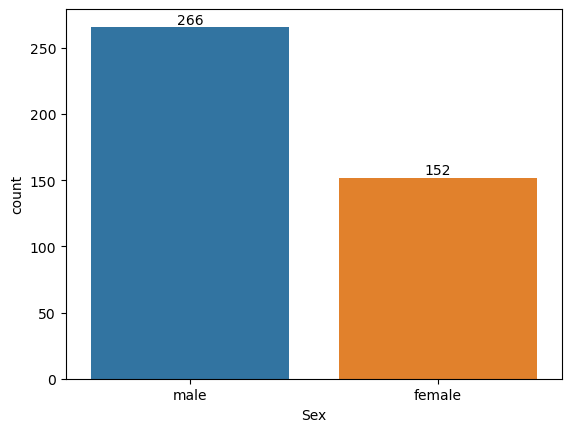

In [15]:
# plotting a bar chart for gender and it's count
gender_count=sns.countplot(x='Sex',data=df_titanic_set)
for gen_bar in gender_count.containers:
    gender_count.bar_label(gen_bar)

##### from above graphs we can see that male strength is more and female strength is less

#### Gender

In [16]:
df_titanic_set['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [17]:
df_titanic_set['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

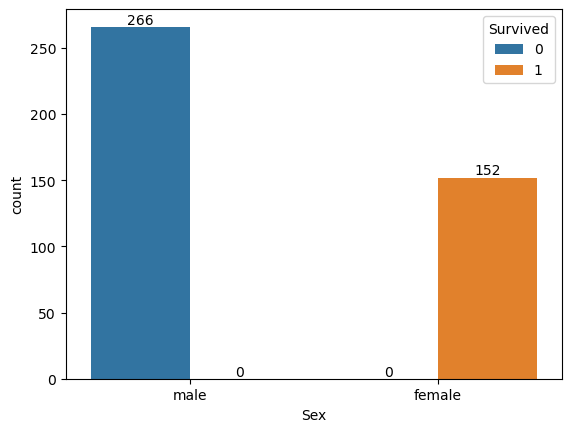

In [18]:
survive_count=sns.countplot(x='Sex',hue='Survived',data=df_titanic_set)

for sur in survive_count.containers:
    survive_count.bar_label(sur) 

In [19]:
df_titanic_set['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
df_titanic_set.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True )
df_titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


<Axes: xlabel='Survived', ylabel='count'>

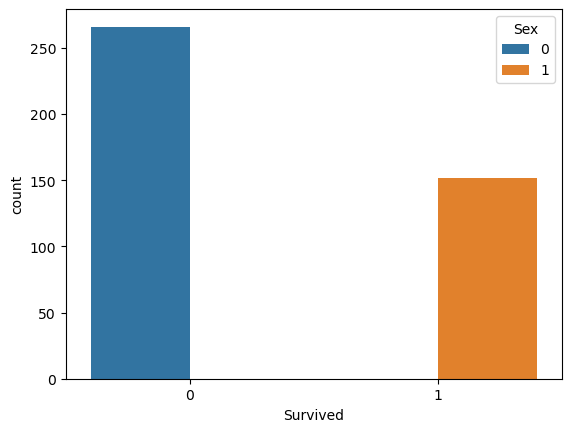

In [21]:
sns.countplot(x=df_titanic_set['Survived'],hue=df_titanic_set['Sex'])

### Model training

#### splitting the data for training and test

In [22]:
x=df_titanic_set.drop(columns=['PassengerId','Name','Ticket','Survived','Age'],axis=1)
y=df_titanic_set['Survived']

In [23]:
print(x,y)

     Pclass  Sex  SibSp  Parch      Fare  Embarked
0         3    0      0      0    7.8292         2
1         3    1      1      0    7.0000         0
2         2    0      0      0    9.6875         2
3         3    0      0      0    8.6625         0
4         3    1      1      1   12.2875         0
..      ...  ...    ...    ...       ...       ...
413       3    0      0      0    8.0500         0
414       1    1      0      0  108.9000         1
415       3    0      0      0    7.2500         0
416       3    0      0      0    8.0500         0
417       3    0      1      1   22.3583         1

[418 rows x 6 columns] 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [24]:
titanic_x_train,titanix_x_test,titanic_y_train,titanic_y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [25]:
print(titanic_x_train)
print(titanix_x_test)

     Pclass  Sex  SibSp  Parch      Fare  Embarked
281       3    0      1      1   13.7750         0
52        2    1      2      1   23.0000         0
303       3    0      0      0    8.6625         0
202       1    0      1      0  227.5250         1
181       1    0      1      1   83.1583         1
..      ...  ...    ...    ...       ...       ...
369       2    0      0      0   13.8583         1
320       3    0      0      0    7.7750         0
15        2    1      1      0   27.7208         1
125       3    1      0      1   16.1000         0
265       3    0      0      0    7.8958         0

[334 rows x 6 columns]
     Pclass  Sex  SibSp  Parch     Fare  Embarked
362       2    1      0      0  21.0000         0
154       3    0      4      2  31.3875         0
47        3    0      0      0   7.7500         2
100       1    1      1      0  55.4417         1
187       3    0      2      0   8.0500         0
..      ...  ...    ...    ...      ...       ...
99        3   

In [26]:
print(titanic_y_train,titanic_y_test)

281    0
52     1
303    0
202    0
181    0
      ..
369    0
320    0
15     1
125    1
265    0
Name: Survived, Length: 334, dtype: int64 362    1
154    0
47     0
100    1
187    0
      ..
99     0
119    1
275    1
319    0
390    0
Name: Survived, Length: 84, dtype: int64


## Logistic Regression

In [27]:
titanic_model_log=LogisticRegression()
titanic_model_log.fit(titanic_x_train,titanic_y_train)

LogisticRegression()

#### Trained data

In [28]:
titanic_training_prediction=titanic_model_log.predict(titanic_x_train)
titanic_training_prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

#### accurancy score

In [29]:
accur_score_log=metrics.accuracy_score(titanic_y_train,titanic_training_prediction)
print('Accuracy Score : ',accur_score_log)

Accuracy Score :  1.0


#### test data

In [30]:
titanic_test_prediction=titanic_model_log.predict(titanix_x_test)
titanic_test_prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [31]:
accur_score_test=metrics.accuracy_score(titanic_y_test,titanic_test_prediction)
print("Accuracy score : ",accur_score_test)

Accuracy score :  1.0


## K -Nearest Neighbour

In [32]:
titanic_model_knn=KNeighborsClassifier()
titanic_model_knn.fit(titanic_x_train,titanic_y_train)

KNeighborsClassifier()

In [33]:
titanic_training_prediction_knn=titanic_model_knn.predict(titanic_x_train)
titanic_training_prediction_knn

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
knn_accurancy_score=metrics.accuracy_score(titanic_y_train,titanic_training_prediction_knn)
print("accur_score_knn : ",knn_accurancy_score)

accur_score_knn :  0.9101796407185628


In [35]:
titanic_test_prediction_knn=titanic_model_knn.predict(titanix_x_test)
titanic_test_prediction_knn

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
knn_accurancy_score_test=metrics.accuracy_score(titanic_y_test,titanic_test_prediction_knn)
print("accur_score_knn : ",knn_accurancy_score_test)

accur_score_knn :  0.8214285714285714


In [37]:
Classification_Report=classification_report(titanic_y_test,titanic_test_prediction_knn)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.83      0.77      0.80        39

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



## Random Forest Classifier

In [39]:
titanic_model_rf=RandomForestClassifier()
titanic_model_rf.fit(titanic_x_train,titanic_y_train)

RandomForestClassifier()

In [40]:
titanic_training_prediction_rf=titanic_model_rf.predict(titanic_x_train)
titanic_training_prediction_rf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [41]:
rf_accurancy_score=metrics.accuracy_score(titanic_y_train,titanic_training_prediction_rf)
print("accur_score_rf : ",rf_accurancy_score)

accur_score_rf :  1.0


In [42]:
titanic_test_prediction_rf=titanic_model_rf.predict(titanix_x_test)
titanic_test_prediction_rf

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [43]:
rf_accurancy_score_test=metrics.accuracy_score(titanic_y_test,titanic_test_prediction_rf)
print("accur_score_rf : ",rf_accurancy_score_test)

accur_score_rf :  1.0
